In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from pandas.plotting import scatter_matrix
%matplotlib inline
sns.set(style='white', color_codes=True)
sns.set(font_scale=1.5)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')

In [3]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [24]:
train.groupby(train['Sex']).sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,135343,233,678,7286.00,218,204,13966.6628
male,262043,109,1379,13919.17,248,136,14727.2865


In [25]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [43]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
train.sum()

PassengerId                                               397386
Survived                                                     342
Pclass                                                      2057
Name           Braund, Mr. Owen HarrisCumings, Mrs. John Brad...
Sex            malefemalefemalefemalemalemalemalemalefemalefe...
Age                                                      21205.2
SibSp                                                        466
Parch                                                        340
Ticket         A/5 21171PC 17599STON/O2. 31012821138033734503...
Fare                                                     28693.9
dtype: object

In [48]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [55]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [58]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [59]:
train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [64]:
train['Age'] = train[['Age', 'Pclass']].apply(age_approx, axis=1)

In [65]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [68]:
train = train.dropna()
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [69]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [71]:
train_dummied = pd.get_dummies(train, columns=['Sex'])

In [78]:
train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,24,1,0,7.2500,S,0,1
1,1,1,37,1,0,71.2833,C,1,0
2,1,3,24,0,0,7.9250,S,1,0
3,1,1,37,1,0,53.1000,S,1,0
4,0,3,24,0,0,8.0500,S,0,1


In [79]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,24,1,0,7.2500,S
1,1,1,female,37,1,0,71.2833,C
2,1,3,female,24,0,0,7.9250,S
3,1,1,female,37,1,0,53.1000,S
4,0,3,male,24,0,0,8.0500,S


In [80]:
train_dummied = pd.get_dummies(train_dummied, columns=['Embarked'])

In [81]:
train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,24,1,0,7.2500,0,1,0,0,1
1,1,1,37,1,0,71.2833,1,0,1,0,0
2,1,3,24,0,0,7.9250,1,0,0,0,1
3,1,1,37,1,0,53.1000,1,0,0,0,1
4,0,3,24,0,0,8.0500,0,1,0,0,1


In [82]:
train_dummied.shape

(889, 11)

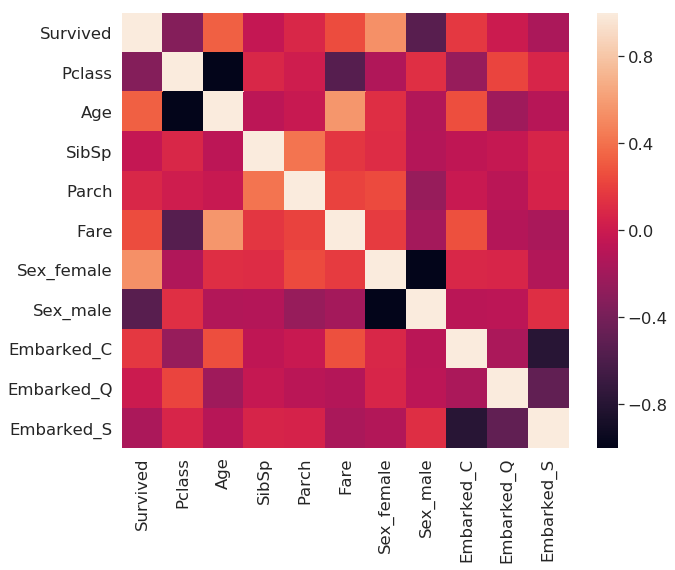

In [83]:
plt.figure(figsize=(10,8))
sns.heatmap(train_dummied.corr())

In [90]:
X_feature = train_dummied.drop('Survived', axis=1).values

In [93]:
X_feature

array([[ 3., 24.,  1., ...,  0.,  0.,  1.],
       [ 1., 37.,  1., ...,  1.,  0.,  0.],
       [ 3., 24.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 24.,  1., ...,  0.,  0.,  1.],
       [ 1., 37.,  0., ...,  1.,  0.,  0.],
       [ 3., 24.,  0., ...,  0.,  1.,  0.]])

In [94]:
Y_target = train.Survived

In [95]:
Y_target

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [97]:
x_train, x_test, y_train, y_test = train_test_split(X_feature, Y_target, test_size=0.2, random_state=3)

In [99]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [100]:
y_pred = lr.predict(x_test)

In [101]:
confusion_matrix(y_test, y_pred)

array([[100,  10],
       [ 27,  41]])

In [103]:
accuracy_score(y_test, y_pred)

0.7921348314606742

In [104]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.91      0.84       110\n           1       0.80      0.60      0.69        68\n\n   micro avg       0.79      0.79      0.79       178\n   macro avg       0.80      0.76      0.77       178\nweighted avg       0.79      0.79      0.78       178\n'